In [ ]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




: 

In [2]:
df = pd.read_csv("df_manjiSW1.csv")

In [4]:
# TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])  
y = df['BinaryNumTarget'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),  
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9780, Precision=0.9788, Recall=0.9783, F1=0.9786
Decision Tree: Accuracy=0.9674, Precision=0.9665, Recall=0.9701, F1=0.9683
Naive Bayes: Accuracy=0.9445, Precision=0.9377, Recall=0.9552, F1=0.9464
KNN: Accuracy=0.7048, Precision=0.6347, Recall=0.9996, F1=0.7764
SVM: Accuracy=0.9798, Precision=0.9795, Recall=0.9813, F1=0.9804


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:14:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9645, Precision=0.9520, Recall=0.9802, F1=0.9659
Logistic Regression: Accuracy=0.9738, Precision=0.9724, Recall=0.9766, F1=0.9745


In [ ]:


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])
y = df['BinaryNumTarget'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan'],

}
knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNN: {grid_search.best_params_}")


best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3}
KNN: Accuracy=0.7609, Precision=0.6822, Recall=0.9991, F1=0.8108


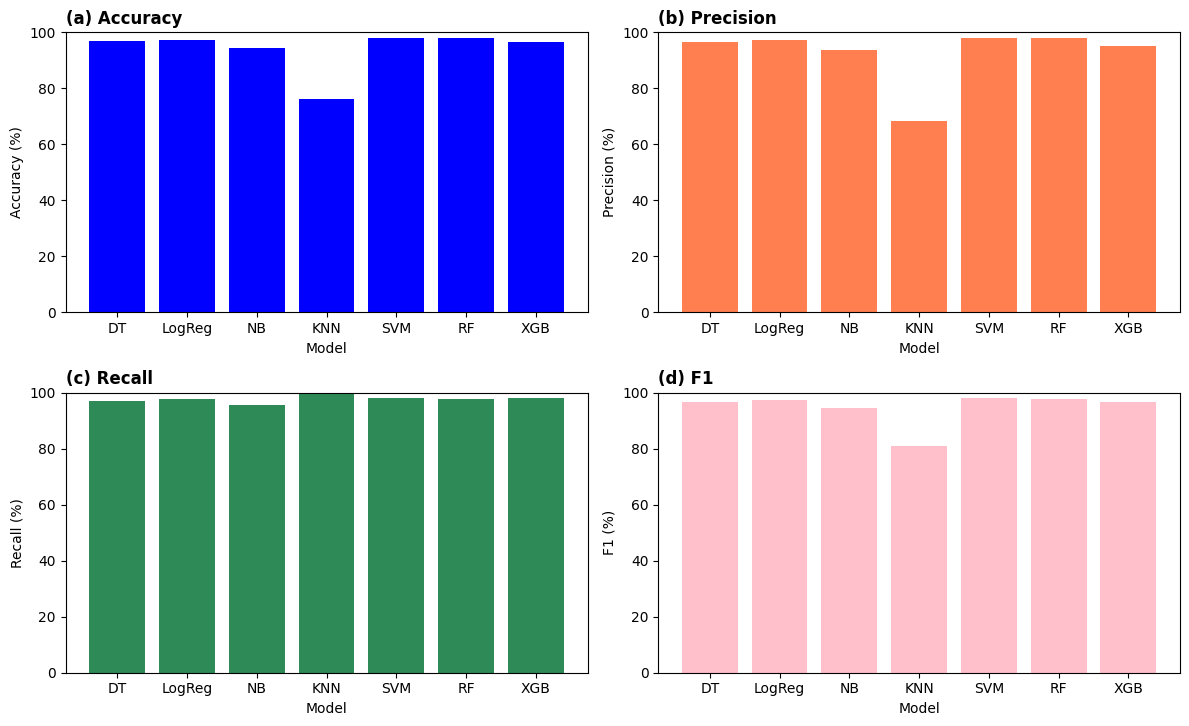

In [5]:
import matplotlib.pyplot as plt

results = {
    "DT":     [0.9674, 0.9665, 0.9701, 0.9683],
    "LogReg": [0.9738, 0.9724, 0.9766, 0.9745],
    "NB":     [0.9445, 0.9377, 0.9552, 0.9464],
    "KNN":    [0.7609, 0.6822, 0.9991, 0.8108],
    "SVM":    [0.9798, 0.9795, 0.9813, 0.9804],
    "RF":     [0.9780, 0.9788, 0.9783, 0.9786],
    "XGB":    [0.9645, 0.9520, 0.9802, 0.9659]
}

metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['blue', 'coral', 'seagreen', 'pink']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    values = [results[model][i] * 100 for model in results]
    ax.bar(results.keys(), values, color=colors[i])
    ax.set_ylim([0, 100])
    ax.set_ylabel(f"{metrics[i]} (%)")
    ax.set_xlabel("Model")
    ax.set_title(f"({chr(97+i)}) {metrics[i]}", loc='left', fontsize=12, fontweight='bold')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
